In [1]:
import shapely
import matplotlib.pyplot as plt

import numpy as np
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint

In [2]:
region = shapely.geometry.Polygon([(0, 0), (100, 0), (100, 100), (0, 100)])

In [3]:
points = np.random.randint(low=0, high=100, size=(20, 2))
circles = dict()
for i, [x, y] in enumerate(points):
    circles[i] = shapely.Point(x, y).buffer(distance=20, resolution=128)


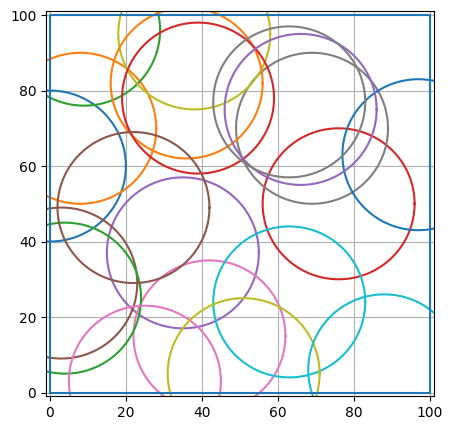

In [4]:
plt.figure(figsize=(5, 5))

for i, _ in enumerate(circles):
    x, y = circles[i].exterior.xy
    plt.plot(x, y)

x, y = region.exterior.xy
plt.plot(x, y)

plt.xlim(-1, 101)
plt.ylim(-1, 101)
plt.grid()
plt.show()

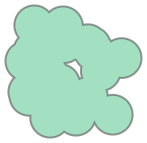

In [5]:
union_circle = circles[0]
for i in range(len(circles)):
    union_circle = union_circle.union(circles[i])

union_circle

In [6]:
total_intersect_area = 0

for i in range(len(circles)):
    for j in range(len(circles)):
        total_intersect_area += circles[i].intersection(circles[j]).area

total_intersect_area = total_intersect_area - \
                       len(circles) * circles[0].intersection(circles[0]).area

total_intersect_area

C:\Users\ains_sengly\anaconda3\envs\venv_01\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


34471.92520867512

In [7]:
def constraint(flat_points):
    points = flat_points.reshape(20, 2)

    circles = dict()

    for i, [x, y] in enumerate(points):
        circles[i] = shapely.Point(x, y).buffer(distance=20, resolution=128)

    union_circle = circles[0]
    for i in range(len(circles)):
        union_circle = union_circle.union(circles[i])

    constraint_area = region.intersection(union_circle).area
    return constraint_area


nlc = NonlinearConstraint(constraint, region.area, np.inf)

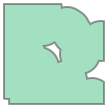

In [8]:
constraint = region.intersection(union_circle)
constraint

In [9]:
region.area

10000.0

In [10]:
constraint.area

9173.889401636061

In [11]:
def intersectionArea(flat_points):
    points = flat_points.reshape(20, 2)

    circles = dict()

    for i, [x, y] in enumerate(points):
        circles[i] = shapely.Point(x, y).buffer(distance=20, resolution=128)

    total_intersect_area = 0

    for i in range(len(circles)):
        for j in range(len(circles)):
            total_intersect_area += circles[i].intersection(circles[j]).area

    total_intersect_area = total_intersect_area - \
                           len(circles) * circles[0].intersection(circles[0]).area

    return np.array(total_intersect_area)

In [12]:
x0 = np.random.uniform(low=0, high=100, size=(20, 2)).reshape(40)
bounds = [(0., 100.)]

In [13]:
result = minimize(
    fun=intersectionArea,
    x0=x0,
    bounds=bounds,
    tol=1e-1,
    constraints=nlc,
    options={"maxiter": 100, 'disp': True}
)

C:\Users\ains_sengly\anaconda3\envs\venv_01\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 14089.421683857778
            Iterations: 56
            Function evaluations: 2360
            Gradient evaluations: 56


In [14]:
tmp_opt = result.x
points_opt = tmp_opt.reshape(20, 2)
points_opt

array([[1.00000000e+02, 2.49674309e-11],
       [3.08857122e-11, 2.03644744e-11],
       [1.00000000e+02, 6.33239904e+01],
       [2.11395596e+01, 1.00000000e+02],
       [1.88825008e+01, 2.39661584e+00],
       [7.18646441e+01, 9.42275758e-12],
       [8.13516183e+01, 8.36254288e+01],
       [6.41895378e+01, 2.92018909e+01],
       [6.10723755e+01, 1.00000000e+02],
       [9.46759429e+01, 4.60187100e+01],
       [4.25264887e+01, 9.21038671e+01],
       [6.02949904e+01, 6.02176149e+01],
       [2.39355851e-11, 6.88105781e+01],
       [4.37504713e+01, 1.54208415e-11],
       [2.96514603e-11, 1.00000000e+02],
       [1.00000000e+02, 1.00000000e+02],
       [3.91082171e-05, 3.42774187e+01],
       [3.22779727e+01, 3.39783807e+01],
       [2.63187070e+01, 6.32405338e+01],
       [1.00000000e+02, 2.34942897e+01]])

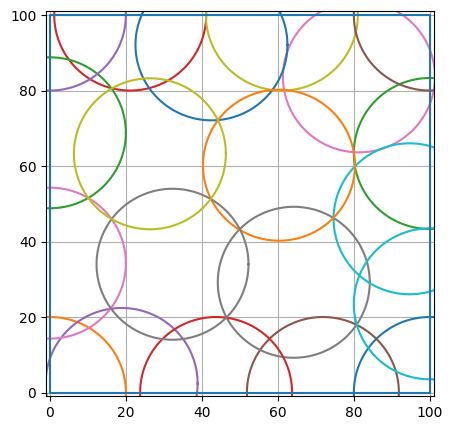

In [15]:
circles = dict()
for i, [x, y] in enumerate(points_opt):
    circles[i] = shapely.Point(x, y).buffer(distance=20, resolution=128)

plt.figure(figsize=(5, 5))

for i, _ in enumerate(circles):
    x, y = circles[i].exterior.xy
    plt.plot(x, y)

x, y = region.exterior.xy
plt.plot(x, y)

plt.xlim(-1, 101)
plt.ylim(-1, 101)
plt.grid()
plt.show()